# In this notebook, I'll try to apply some machine learning techniques for doing data analysis.

### First of all,  I install require packagues for later analysis and I load "whocomplete" dataset from DATASETS directory.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
whodf = pd.read_csv("../DATASETS/whocomplete.csv", sep = ";", decimal= ".", index_col= "Country")
whodf

Continent  Adolescent fertility rate (%)  \
Country                                                                      
Afghanistan                        WestAsia                          151.0   
Albania                              Europe                           27.0   
Algeria                              Africa                            6.0   
Andorra                              Europe                           19.0   
Angola                               Africa                          146.0   
Antigua and Barbuda                AmericaN                           46.0   
Argentina                          AmericaS                           62.0   
Armenia                              Europe                           30.0   
Australia                 SouthAsia-Oceania                           16.0   
Austria                              Europe                           14.0   
Azerbaijan                           Europe                           31.0   
Bahamas                            AmericaN                           46.0   
Bahrain                            WestAsia                           14.0   
Bangladesh                         EastAsia                          135.0   
Barbados                           AmericaN                           51.0   
Belarus                              Europe                           22.0   
Belgium                              Europe                            5.0   
Belize                             AmericaS                           90.0   
Benin                                Africa                          108.0   
Bermuda                            AmericaN                           46.0   
Bhutan                             EastAsia                           62.0   
Bolivia                            AmericaS                           97.0   
Bosnia and Herzegovina               Europe                           25.0   
Botswana                             Africa                           51.0   
Brazil                             AmericaS                           71.0   
Brunei Darussalam         SouthAsia-Oceania                           31.0   
Bulgaria                             Europe                           40.0   
Burkina Faso                         Africa                          131.0   
Burundi                              Africa                           30.0   
Cambodia                           EastAsia                           52.0   
...                                     ...                            ...   
Swaziland                            Africa                           73.0   
Sweden                               Europe                            7.0   
Switzerland                          Europe                            5.0   
Syria                              WestAsia                           58.0   
Taiwan                    SouthAsia-Oceania                           31.0   
Tajikistan                           Europe                           57.0   
Tanzania                             Africa                          139.0   
Thailand                  SouthAsia-Oceania                           70.0   
Timor-Leste               SouthAsia-Oceania                           49.0   
Togo                                 Africa                           89.0   
Tonga                     SouthAsia-Oceania                           17.0   
Trinidad and Tobago                AmericaS                           35.0   
Tunisia                            WestAsia                            8.0   
Turkey                               Europe                           51.0   
Turkmenistan                         Europe                           29.0   
Tuvalu                    SouthAsia-Oceania                           31.0   
Uganda                               Africa                          159.0   
Ukraine                              Europe                           29.0   
United Arab Emirates               WestAsia             

### I change "Gross national income per capita (PPP international $)" column's name by "GNIPPP".

In [15]:
whodf = whodf.rename(columns=lambda x: x.replace('Gross national income per capita (PPP international $)', 'GNIPPP'))

In [16]:
whodf.head(5)

Continent  Adolescent fertility rate (%)  Adult literacy rate (%)  \
Country                                                                         
Afghanistan  WestAsia                          151.0                    28.00   
Albania        Europe                           27.0                    98.70   
Algeria        Africa                            6.0                    69.90   
Andorra        Europe                           19.0                    98.75   
Angola         Africa                          146.0                    67.40   

              GNIPPP  Net primary school enrolment ratio female (%)  \
Country                                                               
Afghanistan   9800.0                                           90.0   
Albania       6000.0                                           93.0   
Algeria       5940.0                                           94.0   
Andorra      15905.0                                           83.0   
Angola        3890.0                                           49.0   

             Net primary school enrolment ratio male (%)  \
Country                                                    
Afghanistan                                         91.0   
Albania                                             94.0   
Algeria                                             96.0   
Andorra                                             83.0   
Angola                                              51.0   

             Population (in thousands) total  \
Country                                        
Afghanistan                          26088.0   
Albania                               3172.0   
Algeria                              33351.0   
Andorra                                 74.0   
Angola                               16557.0   

             Population annual growth rate (%)  Population in urban areas (%)  \
Country                                                                         
Afghanistan                                4.0                           23.0   
Albania                                    0.6                           46.0   
Algeria                                    1.5                           64.0   
Andorra                                    1.0                           93.0   
Angola                                     2.8                           54.0   

             Population median age (years)              ...                \
Country                                                 ...                 
Afghanistan                           16.0              ...                 
Albania                               29.0              ...                 
Algeria                               24.0              ...                 
Andorra                               38.0              ...                 
Angola                                17.0              ...                 

             Total_CO2_emissions  Total_income  Total_reserves  \
Country                                                          
Afghanistan              692.500  2.360000e+10          71.790   
Albania                 3499.120  4.790000e+09          78.140   
Algeria               137535.560  6.970000e+10         351.360   
Andorra                47294.915  3.760000e+10          33.495   
Angola                  8991.460  1.490000e+10          27.130   

             Trade_balance_goods_and_services  Under_five_mortality_from_CME  \
Country                                                                        
Afghanistan                     -2.395000e+07                         257.00   
Albania                         -2.040000e+09                          18.47   
Algeria                          4.700000e+09                          40.00   
Andorra                         -4.550000e+08                           7.75   
Angola                           9.140000e+09                         164.10   

             Under_five_mortality_from_IHME  Under_five_

## CORRELATION GRAPHICS

### In this part I plot the correlation matrix to see the correlation between features. Black color indicates an inverse correlation between features, orange that there's no correlation and finally the white indicates a positive correlation.

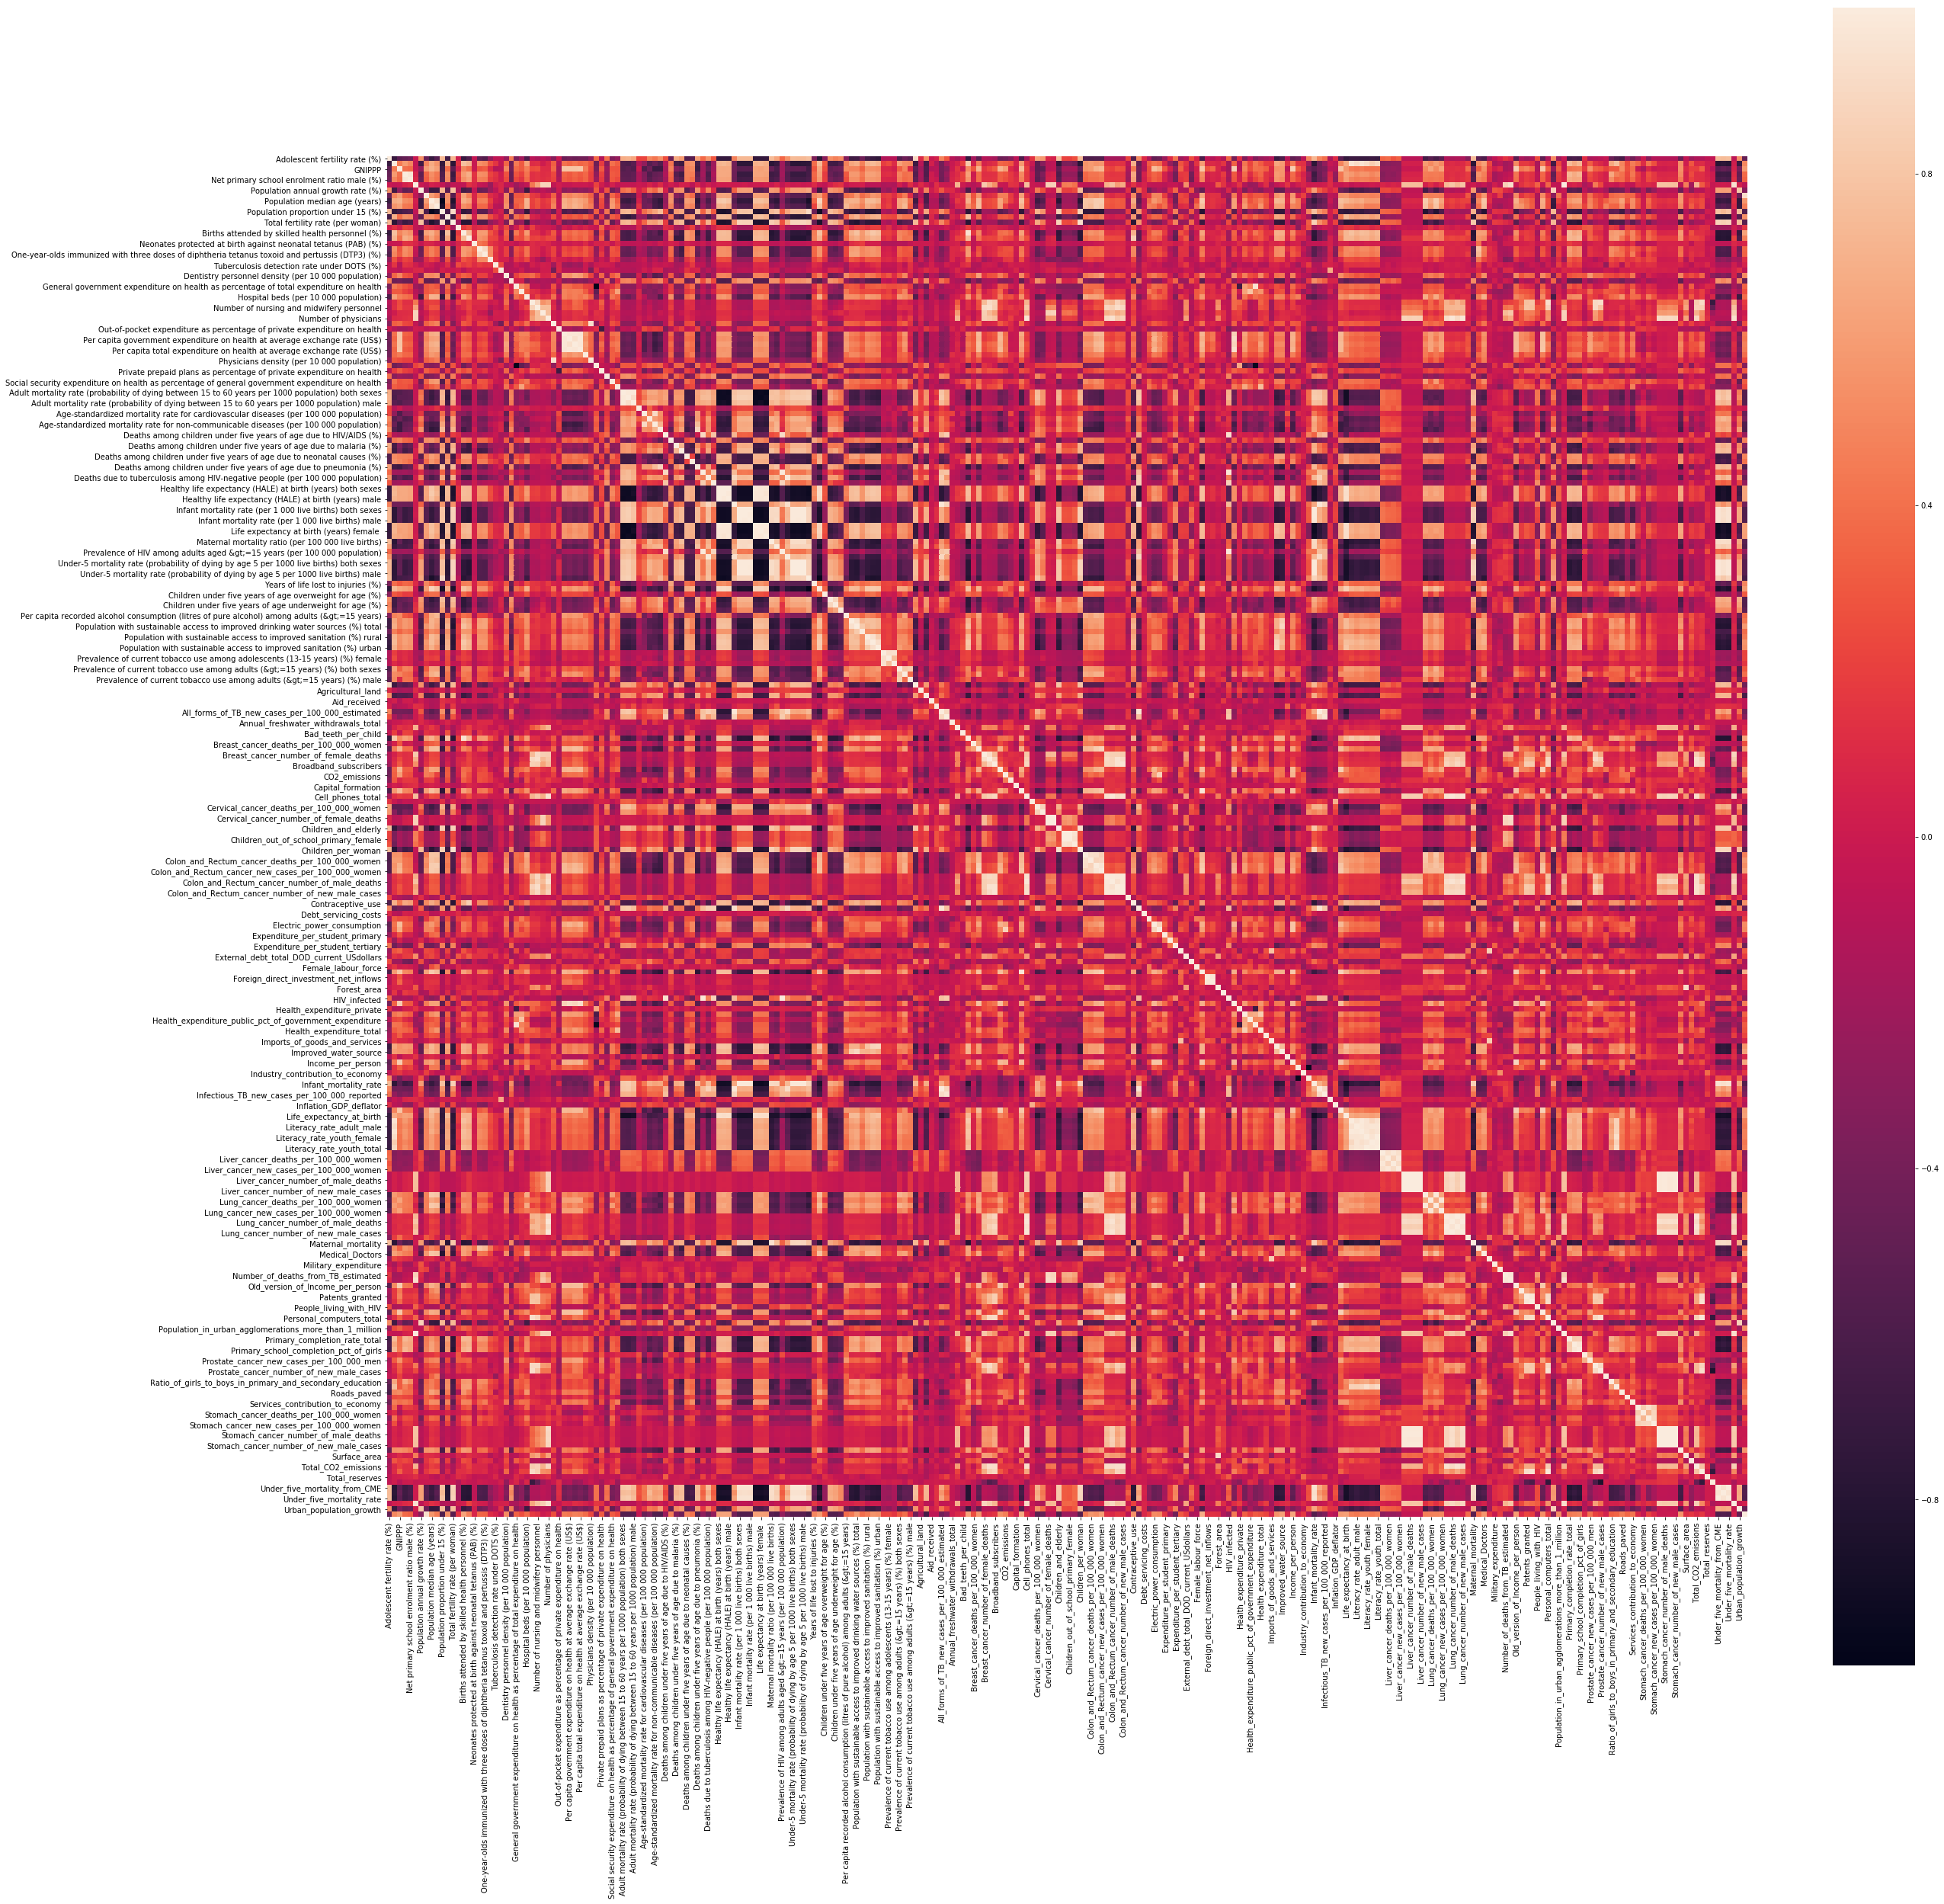

In [17]:
fig, ax =plt.subplots(figsize=(40,40))
sns.heatmap(whodf.corr(), square=True)
plt.show()

### Now I sort the features from more to less correlation (either positive or negative) with "GNIPPP"

In [18]:
corr = whodf.corr()
corr_dict = corr['GNIPPP'].to_dict()
del corr_dict['GNIPPP']
print("List features decendingly by their correlation with GNIPPP:\n")
for ele in sorted(corr_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

List features decendingly by their correlation with GNIPPP:

Health_expenditure_per_person: 	0.8409961123915065
Old_version_of_Income_per_person: 	0.8388690146669734
Income_per_person: 	0.8371069824314472
Per capita total expenditure on health at average exchange rate (US$): 	0.8106885453246334
Personal_computers_per_100_people: 	0.8104305233965251
Fixed_line_and_mobile_phone_subscribers: 	0.7998896017000092
Per capita total expenditure on health (PPP int. $): 	0.7966957566814676
Per capita government expenditure on health at average exchange rate (US$): 	0.7946513446021857
Internet_users: 	0.7945901708675128
Per capita government expenditure on health (PPP int. $): 	0.791573599352193
Electric_power_consumption: 	0.7638100142965389
Cell_phones_per_100_people: 	0.7504185453611474
Colon_and_Rectum_cancer_new_cases_per_100_000_women: 	0.7340582560321617
Broadband_subscribers_per_100_people: 	0.7159997371639175
Breast_cancer_new_cases_per_100_000_women: 	0.7126384828347336
Population media

### Let's see in a graphic the positive relation between "Health_expenditure_per_person" and "GNIPPP" by Continent, because as we can see it's the most influence feature.

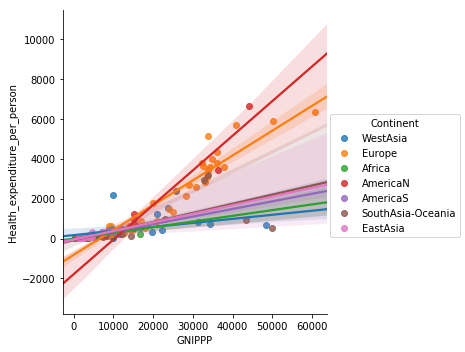

In [19]:
sns.lmplot("GNIPPP", "Health_expenditure_per_person", hue="Continent", data=whodf)

### As we can see, Europe and North-America are the continent with the highest health expenditure and where the slope of the line is greater, which translate into a lower sensitivity of GNIPPP with health expenditure.

### Now I compare first and second most influence by Continent in a pair graph.

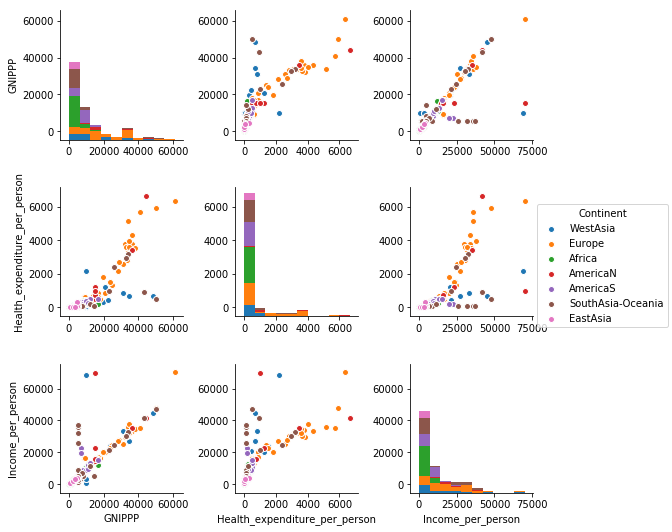

In [20]:
sns.pairplot(whodf[["GNIPPP", "Health_expenditure_per_person", "Income_per_person", "Continent"]], 
             hue="Continent", diag_kind="hist")

### Here we can stand out the correlation between health expenditure and income per person in Europe, North America and in lower level in South Asia-Oceania.
### In the correlation between GNIPPP and Income per person, we can see more equality among continent except Africa and South America.

### Now I'll work with R Studio (Analysis.R notebook) to analyse each feature and choose the model that best fits the question I want to answer. 